In [ ]:
!pip install kaggle

#Bitcoin Historical Data
!kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory -p /content/bitcoin_price_data --unzip


Dataset URL: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory
License(s): CC0-1.0
  0% 0.00/1.70M [00:00<?, ?B/s]
100% 1.70M/1.70M [00:00<00:00, 157MB/s]


In [ ]:

!pip install pycaret[full]         # Full PyCaret installation, including time series
!pip install matplotlib seaborn    # For data visualization
!pip install scikit-learn          # For clustering and anomaly detection
!pip install statsmodels           # For seasonal decomposition in time series


  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.2 MB

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 18.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from pycaret.time_series import *
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load the dataset (adjust the file name if necessary)
bitcoin_data = pd.read_csv('/content/bitcoin_price_data/coin_Bitcoin.csv')

# Display basic information
print("\nDataset Information:")
bitcoin_data.info()

# Display a sample of the data
print("\nSample Data:")
print(bitcoin_data.head())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB

Sample Data:
   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-

In [ ]:
import sweetviz as sv

# Sweetviz Analysis
print("\nGenerating Sweetviz Report...")
sweet_report = sv.analyze(bitcoin_data)
sweet_report.show_html('timeseriesBitcoin_sweetviz_report.html')


Generating Sweetviz Report...


                                             |          | [  0%]   00:00 -> (? left)

Report timeseriesBitcoin_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#Data Preprocessing and EDA

# Convert 'Date' column to datetime format
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data.set_index('Date', inplace=True)

# Check for missing values
print("\nMissing Values:\n", bitcoin_data.isnull().sum())

# Forward fill missing values if any
bitcoin_data.fillna(method='ffill', inplace=True)




Missing Values:
 SNo          0
Name         0
Symbol       0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


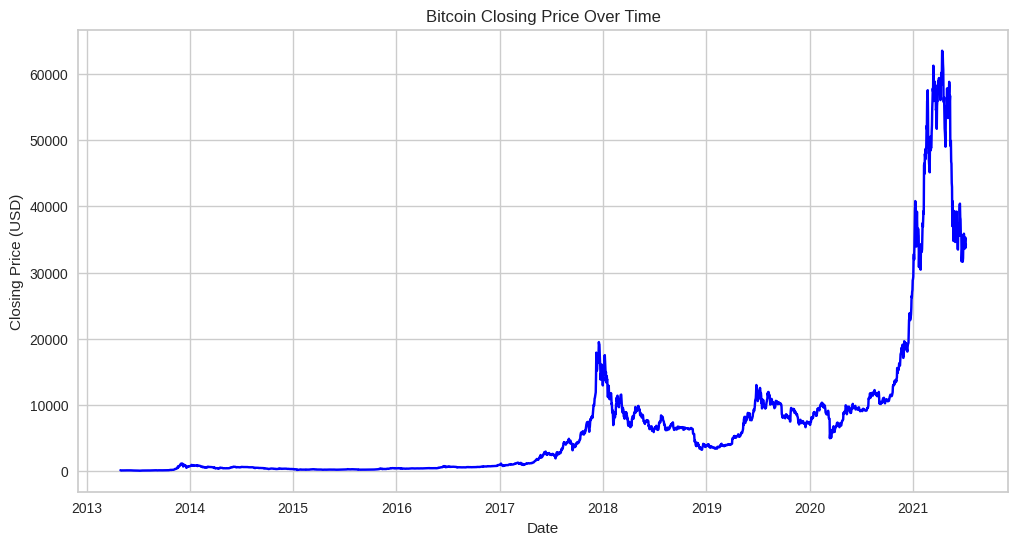

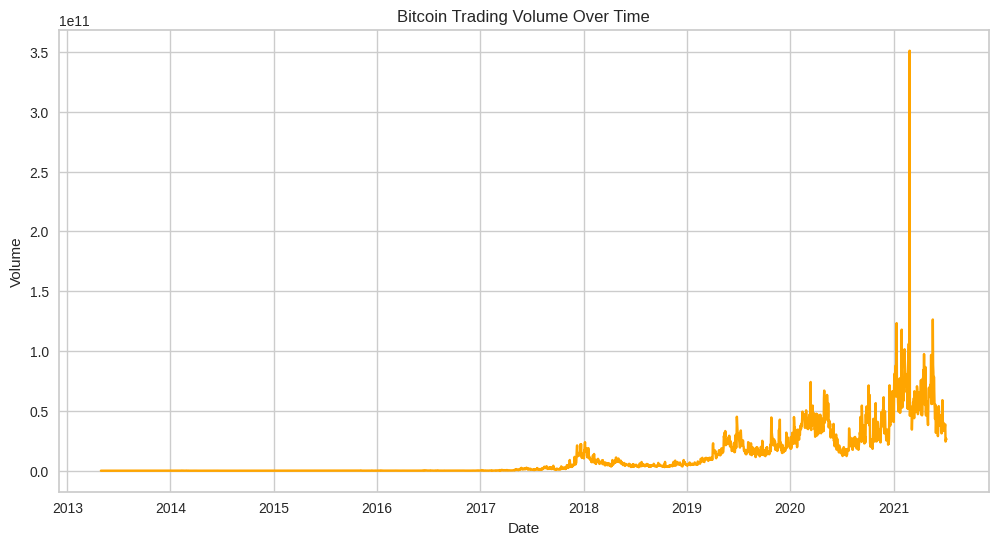

In [ ]:
# Plot Bitcoin closing price over time
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data.index, bitcoin_data['Close'], color='blue')
plt.title("Bitcoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()

# Plot volume traded over time
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data.index, bitcoin_data['Volume'], color='orange')
plt.title("Bitcoin Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


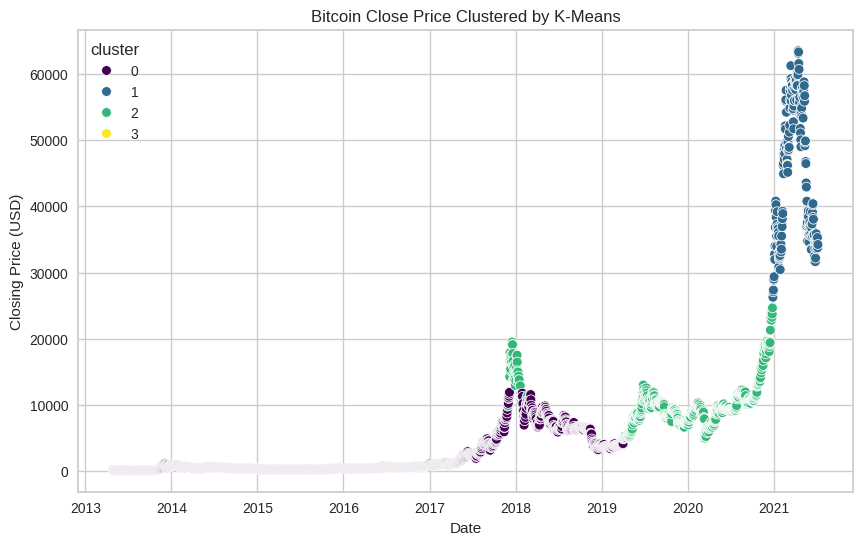

In [ ]:
# Clustering and Anomaly Detection

# Selecting relevant features for clustering
cluster_features = ['Close', 'Volume']
X = bitcoin_data[cluster_features].copy()

# Scaling the features
X_scaled = StandardScaler().fit_transform(X)

# Applying K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
bitcoin_data['cluster'] = kmeans.fit_predict(X_scaled)

# Plot clustering results for 'Close' price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bitcoin_data.index, y='Close', hue='cluster', data=bitcoin_data, palette='viridis', s=50)
plt.title("Bitcoin Close Price Clustered by K-Means")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()


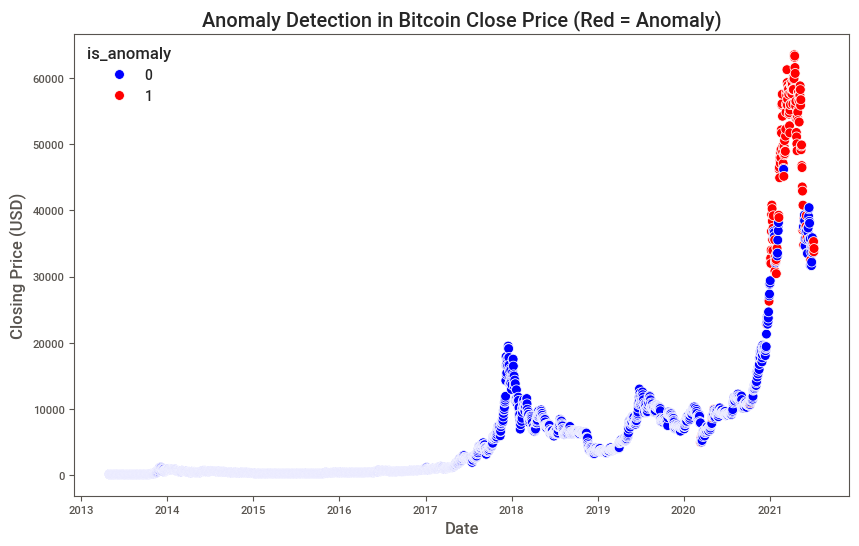

In [ ]:
# Anomaly detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
bitcoin_data['is_anomaly'] = iso_forest.fit_predict(X_scaled)
bitcoin_data['is_anomaly'] = bitcoin_data['is_anomaly'].map({1: 0, -1: 1})

# Plotting anomalies in Bitcoin price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bitcoin_data.index, y='Close', hue='is_anomaly', data=bitcoin_data, palette={0: 'blue', 1: 'red'}, s=50)
plt.title("Anomaly Detection in Bitcoin Close Price (Red = Anomaly)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()


In [ ]:
#Forecasting with PyCaret AutoML

# Initialize PyCaret for time series forecasting
print("Setting up PyCaret for time series forecasting...")
exp_name = setup(data=bitcoin_data[['Close']], session_id=42, fold=5)

# Compare models to find the best one
best_model = compare_models()


Setting up PyCaret for time series forecasting...


,Description,Value
0,session_id,42
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(2991, 1)"
5,Transformed data shape,"(2991, 1)"
6,Transformed train set shape,"(2990, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.7751,0.3050,827.3807,827.3807,0.0243,0.0240,0.3020
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.7805,0.3071,833.2184,833.2184,0.0244,0.0242,0.5660
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.7805,0.3071,833.2184,833.2184,0.0244,0.0242,0.1660
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.7805,0.3071,833.2044,833.2044,0.0244,0.0242,0.2560
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.7858,0.3091,838.6755,838.6755,0.0246,0.0244,0.2180
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.7858,0.3091,838.6678,838.6678,0.0246,0.0244,0.2580
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.7976,0.3138,851.2357,851.2357,0.0251,0.0247,0.2920
exp_smooth,Exponential Smoothing,0.8454,0.3325,902.0937,902.0937,0.0267,0.0260,3.2900
croston,Croston,0.8514,0.3349,908.5649,908.5649,0.0268,0.0264,0.0380
theta,Theta Forecaster,0.8690,0.3419,927.4809,927.4809,0.0272,0.0269,0.1300


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

In [ ]:
# Tune the best model found
print("\nTuning the best model...")
tuned_model = tune_model(best_model)



Tuning the best model...


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2021-06-30,1.2365,0.4859,1317.7773,1317.7773,0.0393,0.0385
1,2021-07-01,0.1125,0.0442,119.9822,119.9822,0.0035,0.0035
2,2021-07-02,0.1787,0.0703,190.6717,190.6717,0.0055,0.0055
3,2021-07-03,1.0298,0.4054,1099.8422,1099.8422,0.0312,0.0317
4,2021-07-04,1.0057,0.3962,1075.4245,1075.4245,0.0319,0.0314
Mean,NaT,0.7127,0.2804,760.7396,760.7396,0.0223,0.0221
SD,NaT,0.4704,0.1850,501.9672,501.9672,0.0148,0.0146


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.3s finished


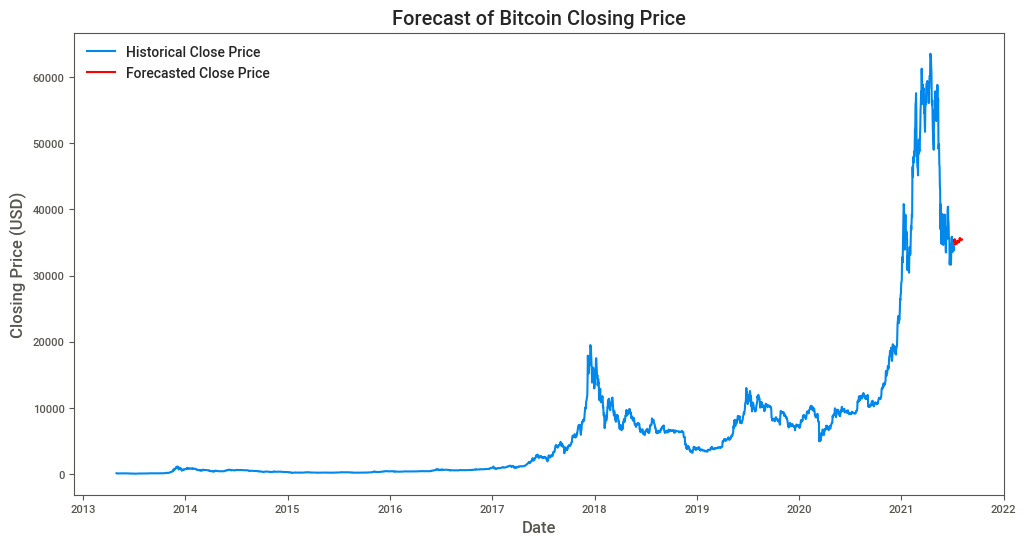

In [ ]:
# Finalize the model and make future predictions
final_model = finalize_model(tuned_model)
future_predictions = predict_model(final_model, fh=30)  # Forecast for the next 30 days

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data.index, bitcoin_data['Close'], label="Historical Close Price")
plt.plot(future_predictions.index, future_predictions, label="Forecasted Close Price", color='red')
plt.title("Forecast of Bitcoin Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()


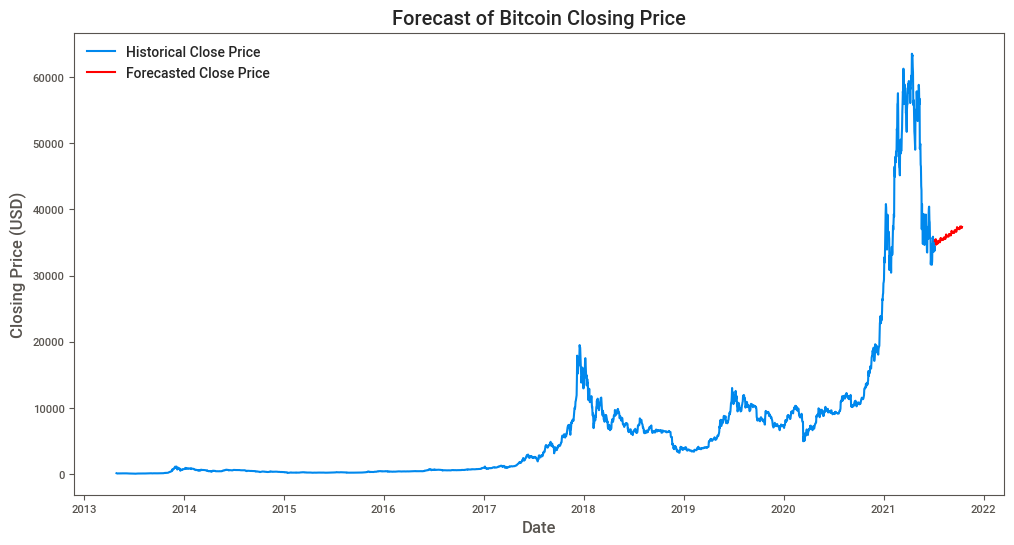

In [ ]:
# Finalize the model and make future predictions
final_model = finalize_model(tuned_model)
future_predictions = predict_model(final_model, fh=100)  # Forecast for the next 30 days

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data.index, bitcoin_data['Close'], label="Historical Close Price")
plt.plot(future_predictions.index, future_predictions, label="Forecasted Close Price", color='red')
plt.title("Forecast of Bitcoin Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()


In [ ]:
# Save the finalized model
save_model(final_model, 'bitcoin_forecast_model')

# Save processed data and predictions if needed
bitcoin_data.to_csv('/content/bitcoin_data_processed.csv')


Transformation Pipeline and Model Successfully Saved
